# Plotting by Archimedes

[Archimedes](http://archimedes.forge.ocamlcore.org/) is an OCaml library for plotting high-quality 2D graphs.
You can embed graphs as PNG image in Jupyter notebooks.


In [1]:
#require "iocaml-kernel";;
#require "archimedes.cairo";;

/home/opam/.opam/4.05.0+trunk/lib/ocaml/unix.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/easy-format: added to search path
/home/opam/.opam/4.05.0+trunk/lib/easy-format/easy_format.cmo: loaded
/home/opam/.opam/4.05.0+trunk/lib/biniou: added to search path
/home/opam/.opam/4.05.0+trunk/lib/biniou/biniou.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/yojson: added to search path
/home/opam/.opam/4.05.0+trunk/lib/yojson/yojson.cmo: loaded
/home/opam/.opam/4.05.0+trunk/lib/ocaml/str.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/atd: added to search path
/home/opam/.opam/4.05.0+trunk/lib/atd/atd.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/atdgen: added to search path
/home/opam/.opam/4.05.0+trunk/lib/atdgen/atdgen.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/bytes: added to search path
/home/opam/.opam/4.05.0+trunk/lib/result: added to search path
/home/opam/.opam/4.05.0+trunk/lib/result/result.cma: loaded
/home/opam/.opam/4.05.0+trunk/lib/lwt: added to search path
/home/opam/.opam/4.05

In [2]:
(* User-defined Archimedes backend "iocaml" *)
module R = Archimedes.Backend.Register(struct
  include Archimedes_cairo.B
  let name = "iocaml"
  let close ~options b =
    Cairo.PNG.write_to_stream ~output:(output_string Iocaml.mime) (Cairo.get_target (Obj.magic b)) ;
    close ~options b ; Iocaml.send_mime ~base64:true "image/png"
end)

module R : sig end

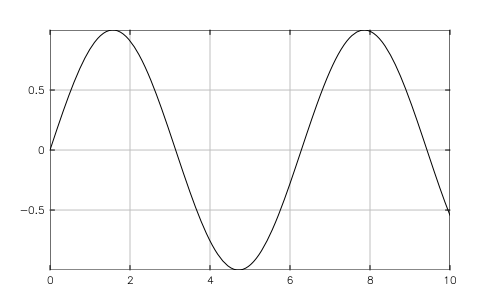

- : unit = ()

In [3]:
let vp = A.init ~w:500. ~h:300. ["iocaml"] in
A.Axes.box vp;
A.fx vp sin 0. 10.;
A.close vp